In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

In [81]:
dados = pd.read_csv('netflix_titles.csv')

In [82]:
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [83]:
colunas = dados.columns

In [84]:
colunas = ['release_year', 'rating', 'duration']

In [85]:
colunas


['release_year', 'rating', 'duration']

In [86]:
dados = dados.dropna(subset=colunas)  # Remover linhas com valores NaN nas colunas selecionadas

In [87]:
# Convertendo colunas categóricas em numéricas
enconder = LabelEncoder()
dados['rating'] = enconder.fit_transform(dados['rating'])

In [88]:
# Função para extrair a duração em número de minutos
def extrair_duracao(x):
    if 'min' in x:
        return int(x.replace(' min', ''))
    else:
        return 0  # Assumindo que shows não possuem "min"

In [89]:
dados['duration'] = dados['duration'].apply(extrair_duracao)


In [90]:
# Normalizando os dados
normalizador = MinMaxScaler(feature_range=(0, 1))
for col in colunas:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))


In [91]:
# Exibindo as primeiras linhas após normalização
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",0.989583,0.307692,0.288462,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",1.000000,0.615385,0.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",1.000000,0.615385,0.000000,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",1.000000,0.615385,0.000000,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1.000000,0.615385,0.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [92]:
# Definindo as variáveis independentes (X) e a variável dependente (Y)
X = dados[colunas].values
Y = enconder.fit_transform(dados['type'])  # 'type' define se é 'Movie' ou 'TV Show'


In [93]:
# Separando os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25, random_state=0)


In [94]:
# Aplicando o modelo Naive-Bayes Gaussiano
modelo1 = GaussianNB()
modelo1.fit(X_treino, Y_treino)


GaussianNB()

In [95]:
# Realizando previsões na amostra de teste
Y_previsto = modelo1.predict(X_teste)

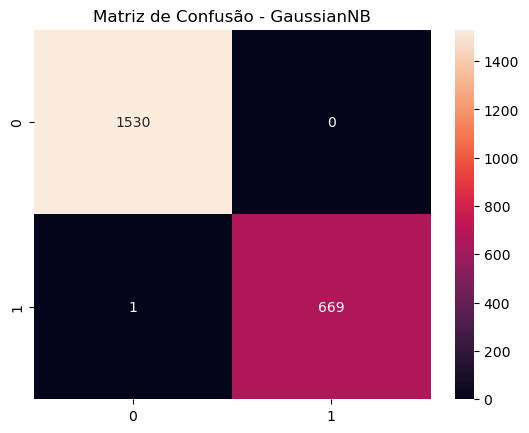

In [96]:
# Gerando a matriz de confusão
cm1 = confusion_matrix(Y_teste, Y_previsto)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title("Matriz de Confusão - GaussianNB")
plt.show()

In [97]:
# Avaliando a acurácia nos conjuntos de treino e teste
print("Score no conjunto de treino:", modelo1.score(X_treino, Y_treino))
print("Score no conjunto de teste:", modelo1.score(X_teste, Y_teste))

Score no conjunto de treino: 0.9987878787878788
Score no conjunto de teste: 0.9995454545454545


In [98]:
# Gerando o relatório de classificação
cr = classification_report(Y_teste, Y_previsto)
print("Relatório de Classificação:\n", cr)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1530
           1       1.00      1.00      1.00       670

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



In [99]:
# Calculando métricas de avaliação
f1 = f1_score(Y_teste, Y_previsto, average='macro')
precisao = precision_score(Y_teste, Y_previsto, average='macro')
rec = recall_score(Y_teste, Y_previsto, average='macro')
acc = accuracy_score(Y_teste, Y_previsto)


In [100]:
# Exibindo as métricas de avaliação
print("F1 score = {:0.2f}%".format(f1 * 100))
print("Precision score = {:0.2f}%".format(precisao * 100))
print("Recall score = {:0.2f}%".format(rec * 100))
print("Accuracy score = {:0.2f}%".format(acc * 100))

F1 score = 99.95%
Precision score = 99.97%
Recall score = 99.93%
Accuracy score = 99.95%
